# Feedforward networks - preliminary experiments

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt

import data_preparation_utils as data_prep
import training_and_evaluation as train_eval
from iterative_updaters import VanillaGradientDescent, MomentumGradientDescent, NesterovMomentumGradientDescent, RMSPropGradientDescent, AdamGradientDescent

C:\Users\Lukasz\AppData\Local\conda\conda\envs\aind\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Function for constructing simple feedforward neural networks:

In [2]:
# this function constructs a simple feedforward neural net with the specified number of hidden layers and neurons
def simple_feedforward_neural_net(inpt, no_of_layers, no_of_neurons, activation_function):
    hidden = tf.layers.dense(inpt, no_of_neurons, activation=activation_function, kernel_initializer=tf.contrib.layers.xavier_initializer())
    for i in range(no_of_layers - 1):
        hidden = tf.layers.dense(hidden, no_of_neurons, activation=activation_function, kernel_initializer=tf.contrib.layers.xavier_initializer())
    return tf.layers.dense(hidden, 1, kernel_initializer=tf.contrib.layers.xavier_initializer())

Try it out using some random parameters and input:

In [3]:
inp = tf.placeholder(dtype=tf.float32,shape=[None,21])
nn = simple_feedforward_neural_net(inp, 3, 100, tf.nn.tanh)
print(nn.shape)

(?, 1)


In [4]:
random_input = np.random.normal(loc=0.0,scale=1.0,size=[1,21])

In [5]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
for i in range(1):
    transfered = sess.run(nn, feed_dict={inp: random_input})
    print(transfered)
sess.close()

[[-0.8706449]]


Now try simple feedforward architecture on 100k traffic lights dataset:

Load the data:

In [6]:
traffic_lights_data = pd.read_csv("100k.csv", header=None)
traffic_lights_data.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,81,14,58,108,83,60,82,61,64,94,...,28,87,73,69,25,7,77,95,5,49082
1,81,92,16,44,95,64,110,98,95,105,...,42,5,40,105,118,48,40,62,45,51223
2,75,20,66,104,20,65,80,97,2,81,...,119,115,118,64,68,46,45,43,18,51461
3,30,42,65,108,67,81,85,32,83,48,...,107,79,44,90,6,25,46,102,62,45119
4,117,20,52,40,25,36,87,78,99,70,...,92,21,34,102,37,46,11,9,66,50660


Normalize:

In [7]:
X, y, X_scaler, y_scaler = data_prep.scale_standard_traffic_light_data(traffic_lights_data)

C:\Users\Lukasz\AppData\Local\conda\conda\envs\aind\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.35,-0.766667,-0.033333,0.800000,0.383333,0.000000,0.366667,0.016667,0.066667,0.566667,...,-0.550000,-0.533333,0.450000,0.216667,0.150000,-0.583333,-0.883333,0.283333,0.583333,-0.916667
1,0.35,0.533333,-0.733333,-0.266667,0.583333,0.066667,0.833333,0.633333,0.583333,0.750000,...,0.983333,-0.300000,-0.916667,-0.333333,0.750000,0.966667,-0.200000,-0.333333,0.033333,-0.250000
2,0.25,-0.666667,0.100000,0.733333,-0.666667,0.083333,0.333333,0.616667,-0.966667,0.350000,...,0.050000,0.983333,0.916667,0.966667,0.066667,0.133333,-0.233333,-0.250000,-0.283333,-0.700000
3,-0.50,-0.300000,0.083333,0.800000,0.116667,0.350000,0.416667,-0.466667,0.383333,-0.200000,...,-0.650000,0.783333,0.316667,-0.266667,0.500000,-0.900000,-0.583333,-0.233333,0.700000,0.033333
4,0.95,-0.666667,-0.133333,-0.333333,-0.583333,-0.400000,0.450000,0.300000,0.650000,0.166667,...,-0.483333,0.533333,-0.650000,-0.433333,0.700000,-0.383333,-0.233333,-0.816667,-0.850000,0.100000


In [9]:
X_scaler.inverse_transform(X).head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,81.0,14.0,58.0,108.0,83.0,60.0,82.0,61.0,64.0,94.0,...,27.0,28.0,87.0,73.0,69.0,25.0,7.0,77.0,95.0,5.0
1,81.0,92.0,16.0,44.0,95.0,64.0,110.0,98.0,95.0,105.0,...,119.0,42.0,5.0,40.0,105.0,118.0,48.0,40.0,62.0,45.0
2,75.0,20.0,66.0,104.0,20.0,65.0,80.0,97.0,2.0,81.0,...,63.0,119.0,115.0,118.0,64.0,68.0,46.0,45.0,43.0,18.0
3,30.0,42.0,65.0,108.0,67.0,81.0,85.0,32.0,83.0,48.0,...,21.0,107.0,79.0,44.0,90.0,6.0,25.0,46.0,102.0,62.0
4,117.0,20.0,52.0,40.0,25.0,36.0,87.0,78.0,99.0,70.0,...,31.0,92.0,21.0,34.0,102.0,37.0,46.0,11.0,9.0,66.0


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=831191)

In [8]:
y_scaler.inverse_transform(y)

array([49082., 51223., 51461., ..., 52152., 46318., 45916.])

Now construct the neural net and define the loss:

In [11]:
nn_input = tf.placeholder(dtype=tf.float32, shape=[None, 21])
targets = tf.placeholder(dtype=tf.float32, shape=[None, 1])
nn_output = simple_feedforward_neural_net(nn_input, 3, 40, tf.nn.tanh)

Now define the optimizer:

In [12]:
optimizer = tf.train.AdamOptimizer(0.0035)

Initialize batch iterator: 

In [13]:
batch_iterator = data_prep.BatchIterator(X_train, y_train, 997)

Now, train for several epochs:

In [14]:
test_and_batch_losses = train_eval.train_model(nn_output, nn_input, targets, optimizer, 100000, batch_iterator, X_test, y_test, "trained_networks/feedforward_test_model.ckpt", 1000, verbose=True)

Test loss: 1.237206, batch loss: 1.570666, model saved under trained_networks/feedforward_test_model.ckpt
Test loss: 0.436956, batch loss: 0.394715, model saved under trained_networks/feedforward_test_model.ckpt
Test loss: 0.344493, batch loss: 0.338945, model saved under trained_networks/feedforward_test_model.ckpt
Test loss: 0.311926, batch loss: 0.290142, model saved under trained_networks/feedforward_test_model.ckpt
Test loss: 0.276130, batch loss: 0.274036, model saved under trained_networks/feedforward_test_model.ckpt
Test loss: 0.258717, batch loss: 0.253324, model saved under trained_networks/feedforward_test_model.ckpt
Test loss: 0.251997, batch loss: 0.220988, model saved under trained_networks/feedforward_test_model.ckpt
Test loss: 0.240885, batch loss: 0.227649, model saved under trained_networks/feedforward_test_model.ckpt
Test loss: 0.230151, batch loss: 0.228101, model saved under trained_networks/feedforward_test_model.ckpt
Test loss: 0.212949, batch loss: 0.202346, mod

Test loss: 0.122758, batch loss: 0.113269, model saved under trained_networks/feedforward_test_model.ckpt
Test loss: 0.125819, batch loss: 0.118823, model saved under trained_networks/feedforward_test_model.ckpt
Test loss: 0.123856, batch loss: 0.118241, model saved under trained_networks/feedforward_test_model.ckpt
Test loss: 0.122900, batch loss: 0.122555, model saved under trained_networks/feedforward_test_model.ckpt
Test loss: 0.121535, batch loss: 0.114923, model saved under trained_networks/feedforward_test_model.ckpt
Test loss: 0.122298, batch loss: 0.109860, model saved under trained_networks/feedforward_test_model.ckpt
Test loss: 0.121169, batch loss: 0.106351, model saved under trained_networks/feedforward_test_model.ckpt
Test loss: 0.123055, batch loss: 0.111692, model saved under trained_networks/feedforward_test_model.ckpt
Test loss: 0.121232, batch loss: 0.105558, model saved under trained_networks/feedforward_test_model.ckpt
Test loss: 0.123161, batch loss: 0.109935, mod

Check relative accuracy on test set:

In [15]:
model_avg_error, actual_vs_predicted = train_eval.evaluate_model_on_a_dataset("trained_networks/feedforward_test_model.ckpt", nn_output,nn_input, X_test, y_test, y_scaler)
print(model_avg_error)

INFO:tensorflow:Restoring parameters from trained_networks/feedforward_test_model.ckpt
0.01836065475095403


Text(0.5,1,'Actual vs. predicted')

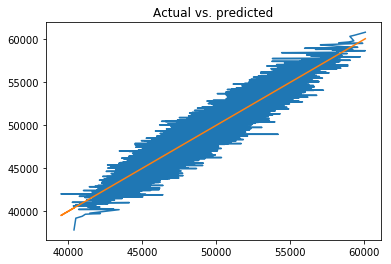

In [9]:
y_test_sorted = [x[0] for x in actual_vs_predicted]
y_test_pred_sorted = [x[1] for x in actual_vs_predicted]
plt.plot(y_test_pred_sorted, y_test_sorted)
plt.plot(y_test_pred_sorted, y_test_pred_sorted)
plt.title("Actual vs. predicted")

Restore model from checkpoint:

In [37]:
# close session (if open)
try:
    sess.close()
except:
    pass

# open new session
sess =  tf.Session()

saver = tf.train.Saver()
saver.restore(sess, "trained_networks/feedforward_test_model.ckpt")

INFO:tensorflow:Restoring parameters from trained_networks/feedforward_test_model.ckpt


Generate gradient descent trajectory:

In [40]:
updater = MomentumGradientDescent()

trajectory = train_eval.generate_gradient_descent_trajectory(sess, nn_output, nn_input, X_scaler, y_scaler, updater, 1000, 10, verbose=True)

Prediction 43989.261719, rounded: 43954.707031
Prediction 38207.996094, rounded: 38215.027344
Prediction 37452.195312, rounded: 37475.378906
Prediction 36353.804688, rounded: 36351.171875
Prediction 35962.652344, rounded: 35949.296875
Prediction 35608.078125, rounded: 35602.902344
Prediction 35529.089844, rounded: 35534.917969
Prediction 35471.574219, rounded: 35471.945312
Prediction 35437.890625, rounded: 35445.808594
Prediction 35413.847656, rounded: 35414.531250
Prediction 35396.105469, rounded: 35406.914062
Prediction 35381.714844, rounded: 35385.710938
Prediction 35369.820312, rounded: 35359.558594
Prediction 35359.746094, rounded: 35359.558594
Prediction 35351.039062, rounded: 35356.875000
Prediction 35343.425781, rounded: 35337.859375
Prediction 35336.703125, rounded: 35337.859375
Prediction 35330.707031, rounded: 35336.679688
Prediction 35325.320312, rounded: 35337.089844
Prediction 35320.453125, rounded: 35337.089844
Prediction 35316.023438, rounded: 35309.835938
Prediction 35

Generate many trajectories:

In [42]:
no_of_trajectories = 100

updater = NesterovMomentumGradientDescent()

trajectories = train_eval.generate_and_join_multiple_gradient_descent_trajectories(sess, no_of_trajectories, nn_output, nn_input, X_scaler, y_scaler, updater, 1000, 100, verbose=True, trajectories_verbose=False)

Generating trajectory 1
Generating trajectory 2
Generating trajectory 3
Generating trajectory 4
Generating trajectory 5
Generating trajectory 6
Generating trajectory 7
Generating trajectory 8
Generating trajectory 9
Generating trajectory 10
Generating trajectory 11
Generating trajectory 12
Generating trajectory 13
Generating trajectory 14
Generating trajectory 15
Generating trajectory 16
Generating trajectory 17
Generating trajectory 18
Generating trajectory 19
Generating trajectory 20
Generating trajectory 21
Generating trajectory 22
Generating trajectory 23
Generating trajectory 24
Generating trajectory 25
Generating trajectory 26
Generating trajectory 27
Generating trajectory 28
Generating trajectory 29
Generating trajectory 30
Generating trajectory 31
Generating trajectory 32
Generating trajectory 33
Generating trajectory 34
Generating trajectory 35
Generating trajectory 36
Generating trajectory 37
Generating trajectory 38
Generating trajectory 39
Generating trajectory 40
Generatin